# Supervised Learning

- Machine identifies objects by training over massive number of examples (adequate data?).

- Machine Learning operates on large chunk of data.

- Supervised learning depends on labeling and classification. 

# Comparing the Traditional Statistics with Machine Learning

- **Traditional Statistics**
- Build a model to estimate a relationship.
Fit the model to data perhaps with a subset of a data reserved for out of sample data.

- Make a case for the validity of the data by means of a story.

- **Machine Learning**
- Let data identify features for classification.

- Add parameters to traditional statistical methods.

- Evaluate the results though a primary focus on.

# Unsupervised Learning

- Unsupervised learning trains the model without labels.

- Prior focus is on finding patterns.

- Using **Principal Component Analysis**

- Clustering

- Graphical Networks


In [2]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [4]:
file_name = 'ReturnsData_Daily.csv'
df = pd.read_csv(file_name, low_memory=False, index_col=0) # set the first column (date) as index
df.index=pd.to_datetime(df.index) # set index (i.e. date) as a datetime object
display(df)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,-0.051966,-0.065617,-0.060338,-0.034869,-0.050505,-0.031161,-0.032457,-0.062376,-0.054291,...,0.006512,-0.029480,NaN,-0.034632,-0.008430,0.088754,NaN,-0.001606,NaN,-0.009549
2000-01-04,NaN,-0.031111,-0.033708,-0.023493,-0.059355,-0.042553,-0.001462,-0.051118,-0.062987,-0.074074,...,-0.037893,-0.017586,NaN,0.000000,-0.005313,-0.084310,NaN,-0.033780,NaN,-0.038345
2000-01-05,NaN,0.004587,-0.002907,-0.006173,0.010974,0.003704,-0.005857,-0.008418,-0.046828,-0.036500,...,0.042267,0.054516,NaN,0.017937,0.034188,0.014634,NaN,0.010544,NaN,0.001922
2000-01-06,NaN,0.047184,0.032070,0.014197,0.071913,0.065191,0.008837,0.044143,0.042789,0.019201,...,0.008295,0.049383,NaN,0.042584,0.002066,-0.086538,NaN,-0.033498,NaN,0.000956
2000-01-07,NaN,0.001453,0.022599,0.018373,-0.013924,-0.002309,-0.013139,0.017886,0.003799,0.031059,...,0.095978,-0.000735,NaN,0.017606,-0.018557,0.047368,NaN,0.013068,NaN,0.027090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.011060,-0.025855
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,-0.017947,0.010959
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.029033,-0.024227


In [6]:
for name in df.columns:
    print(name)

FRC
PNC
USB
JPM
BAC
C
RY
WFC
GS
MS
HSBC
JNJ
PFE
MRK
XOM
RDS
CVS
BP
AAPL
GOOG
MSFT
BABA
SP500


In [9]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
FRC,2404.0,0.000734,0.017196,-0.150909,-0.007268,0.000689,0.008937,0.128799
PNC,5156.0,0.000568,0.023833,-0.413958,-0.008310,0.000269,0.009010,0.370909
USB,5156.0,0.000495,0.021910,-0.181653,-0.007648,0.000538,0.008207,0.228412
JPM,5156.0,0.000539,0.024902,-0.207274,-0.008974,0.000235,0.009709,0.250967
BAC,5156.0,0.000519,0.029287,-0.289694,-0.009532,0.000287,0.010111,0.352691
C,5156.0,0.000161,0.031202,-0.390244,-0.009944,0.000000,0.010086,0.578249
RY,5156.0,0.000625,0.015948,-0.150961,-0.006350,0.000656,0.007730,0.163435
WFC,5156.0,0.000457,0.024632,-0.238223,-0.007965,0.000155,0.008319,0.327645
GS,5156.0,0.000468,0.023717,-0.189596,-0.010136,0.000335,0.011087,0.264678
MS,5156.0,0.000511,0.031907,-0.258929,-0.011930,0.000230,0.012532,0.869835


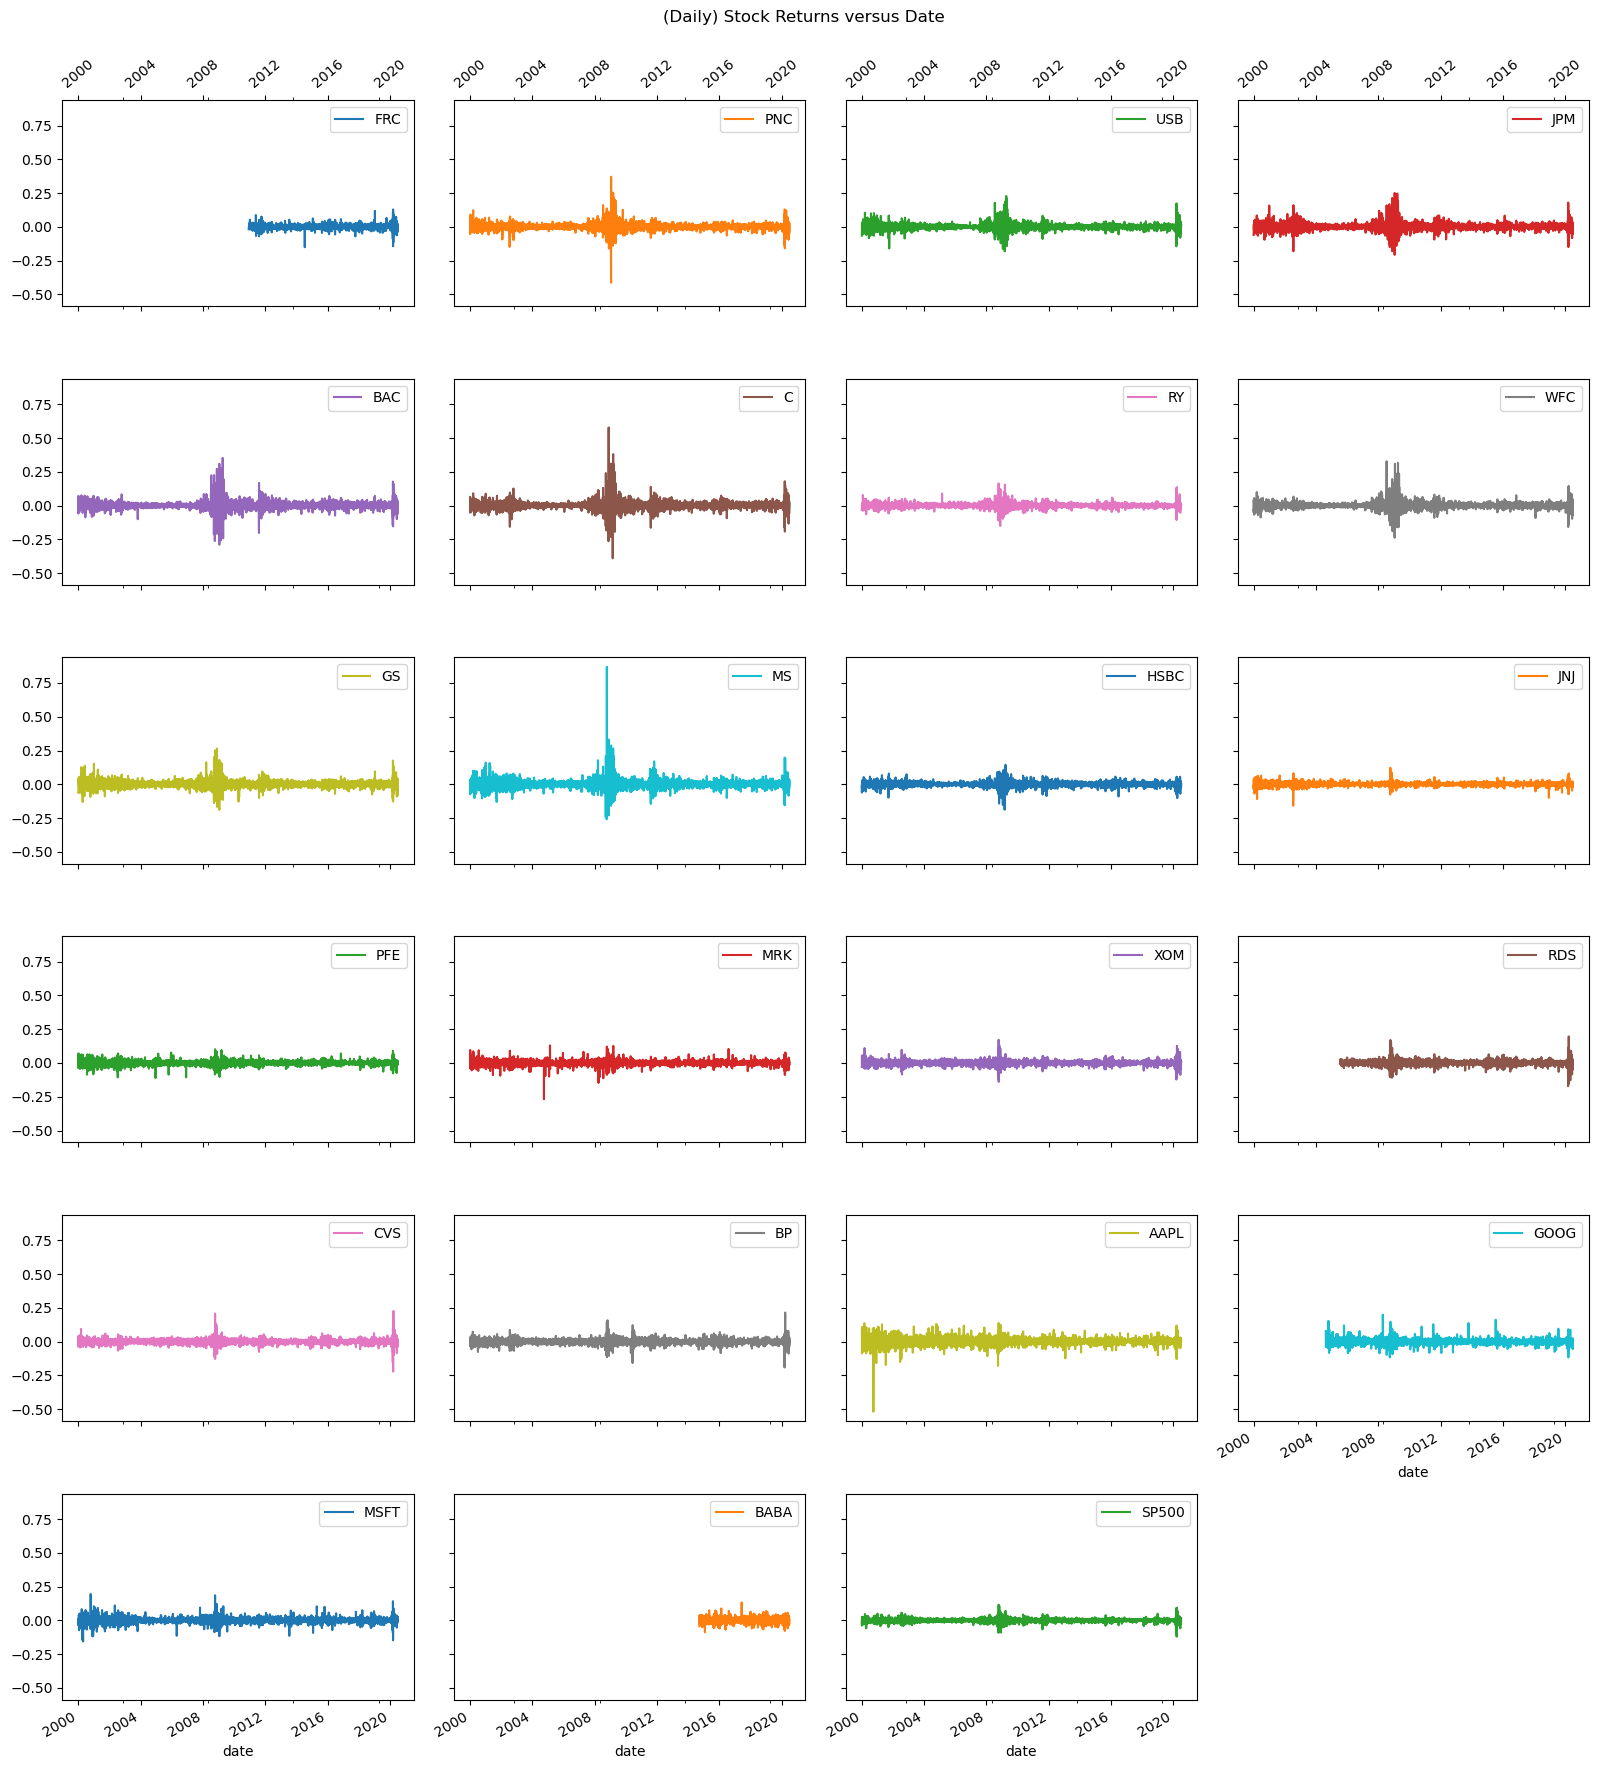

In [10]:
## Plot the Daily Stock Returns versus Date

n = len(df.columns) 
col = 4 #specify the number of columns for the plot
row = int(np.ceil(n/col)) #specify the number of rows
fig_hei = row * 3 #specify height for the plot
fig_wid = col * 4 #specify width for the lot

ax = df.plot(subplots=True, layout=(row ,col), figsize=(fig_wid, fig_hei),
             sharey=True, sharex=True, #share y and x axis for the subplots
             title = '(Daily) Stock Returns versus Date')

for i in range(col): #add x tickers to the top of the plot
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40) 
    
fig = ax[0,0].get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.93) #to indirectly adjust the location of the title

plt.show()